In [67]:
import pandas as pd
import numpy as np
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('scrubbed.csv')
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [69]:
df['year'] = df['datetime']

for i, sample in enumerate(df['year']):
    sample = sample[:-6]
    df['year'].at[i] = parse(sample).year

In [70]:
for i, duration in enumerate(df['duration (seconds)']):
    try:
        df['duration (seconds)'].at[i] = float(duration)
    except:
        duration = duration[:-1]
        df['duration (seconds)'].at[i] = float(duration)
        
df['duration (seconds)'] = df['duration (seconds)'].astype(float)

In [71]:
for i, latitude in enumerate(df['latitude']):
    try:
        df['latitude'].at[i] = float(latitude)
    except:
        df['latitude'] = 33.200088

df['latitude'] = df['latitude'].astype(float)

In [72]:
df.to_csv(path_or_buf='clean.csv')

In [73]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,33.200088,-97.941111,1949
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,33.200088,-98.581082,1949
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,33.200088,-2.916667,1955
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,33.200088,-96.645833,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,33.200088,-157.803611,1960


In [66]:
df.loc[43782]

datetime                                                  5/22/1974 05:30
city                                         mescalero indian reservation
state                                                                  nm
country                                                               NaN
shape                                                           rectangle
duration (seconds)                                                    180
duration (hours/min)                                            two hours
comments                Huge rectangular object emmitting intense whit...
date posted                                                     4/18/2012
latitude                                                       33q.200088
longitude                                                        -105.624
year                                                                 1974
Name: 43782, dtype: object

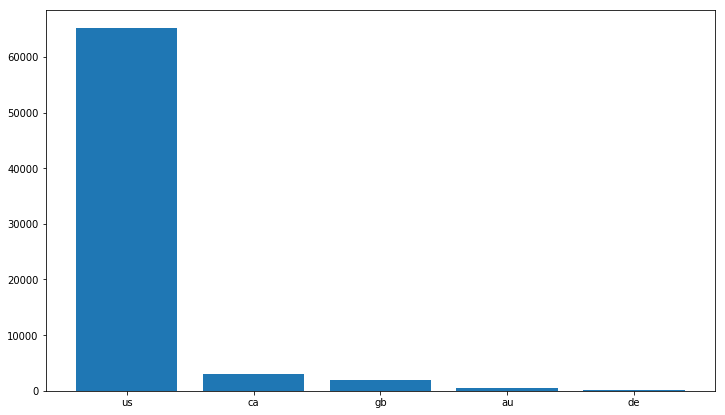

In [6]:
plt.figure(figsize=(12,7))
plt.bar(df['country'].value_counts().index.tolist(),height=df['country'].value_counts().values.tolist())
plt.show()

Since the NUFORC is an American organization, most of the sightings were reported from the US/Canada.

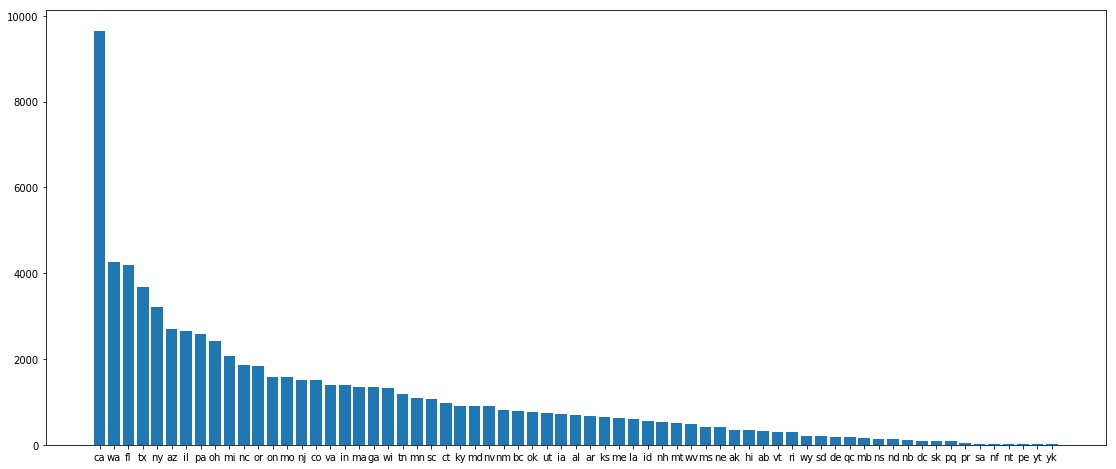

In [7]:
plt.figure(figsize=(19,8))
plt.bar(df['state'].value_counts().index.tolist(),height=df['state'].value_counts().values.tolist())
plt.show()

C:\Users\Me\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


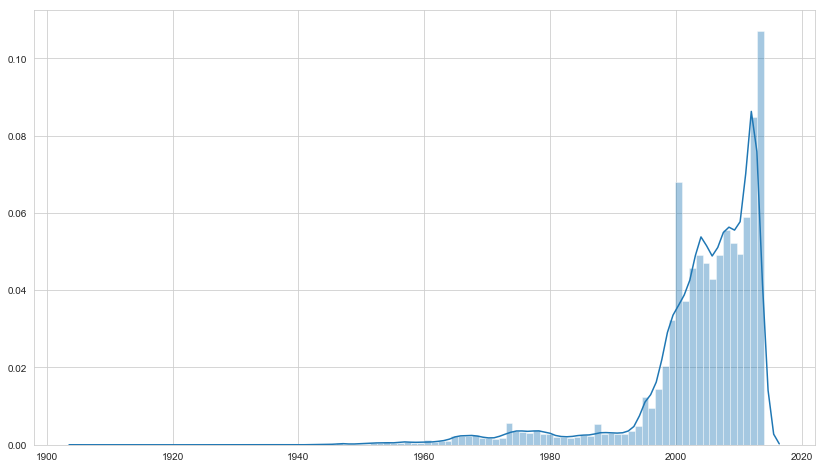

In [8]:
sns.set_style('whitegrid')

plt.figure(figsize=(14,8))
sns.distplot(df['year'].tolist(), bins=100)
plt.show()

In [9]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960


In [ ]:
plt.figure(figsize=(20,16))
plt.bar(df['city'].value_counts().index.tolist()[:30], height=df['city'].value_counts().values.tolist()[:30])
plt.show

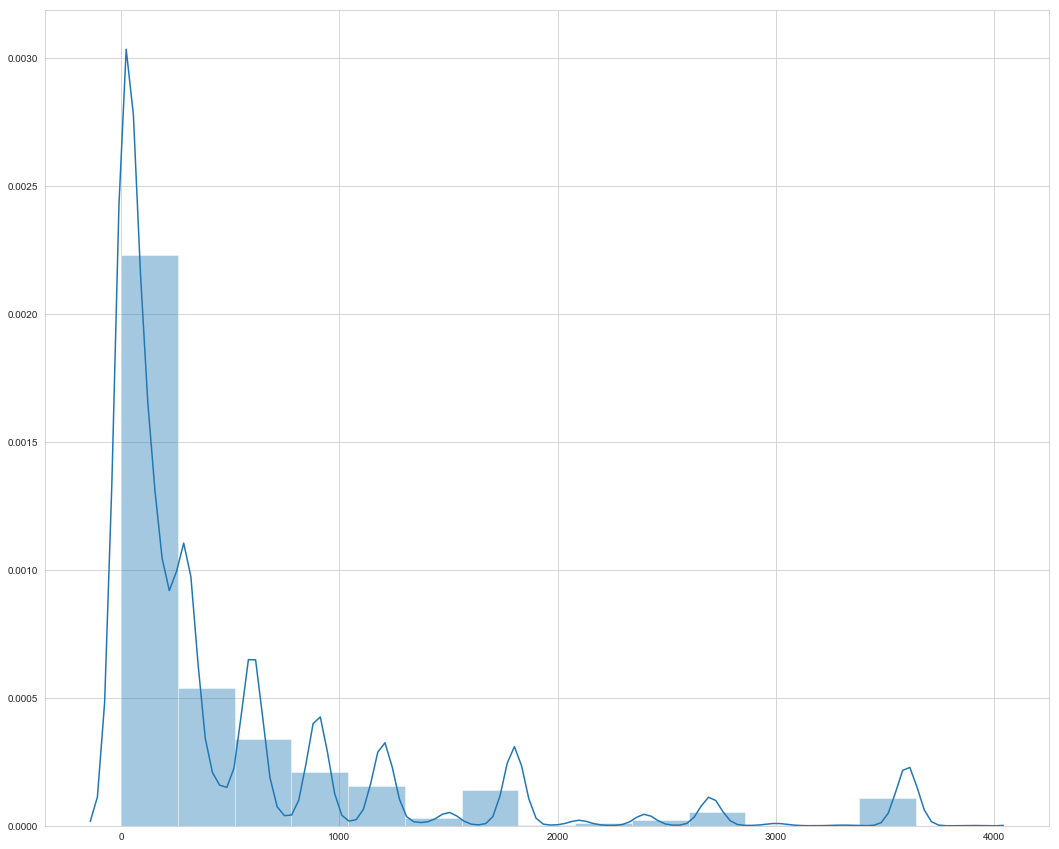

In [95]:
plt.figure(figsize=(18,15))
duration = df[df['duration (seconds)'] < 4000].loc[:,'duration (seconds)']
duration = duration.tolist()
sns.distplot(duration, bins=15)
plt.show()

In [76]:
df['duration (seconds)']

0         2700.0
1         7200.0
2           20.0
3           20.0
4          900.0
5          300.0
6          180.0
7         1200.0
8          180.0
9          120.0
10         300.0
11         180.0
12        1800.0
13         180.0
14          30.0
15        1200.0
16         120.0
17        1800.0
18          20.0
19        2700.0
20        1200.0
21        1200.0
22         360.0
23          60.0
24           3.0
25          30.0
26          30.0
27         300.0
28         900.0
29         270.0
          ...   
80302    10800.0
80303      600.0
80304      120.0
80305      900.0
80306       10.0
80307      600.0
80308     1290.0
80309       60.0
80310      300.0
80311      900.0
80312        5.0
80313        1.0
80314      180.0
80315      120.0
80316        4.0
80317        8.0
80318       90.0
80319     3600.0
80320       60.0
80321        3.0
80322       15.0
80323       60.0
80324      120.0
80325      180.0
80326       20.0
80327      600.0
80328     1200.0
80329     1200